In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from matplotlib import colors
from collections import Counter, defaultdict
from datetime import datetime

In [3]:
df = pd.read_csv("Data/marketing_campaign.csv", sep="\t")
drop_columns = ["ID", 'Z_CostContact', 'Z_Revenue']
df = df.drop(drop_columns, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [4]:
for row in range(len(df["Dt_Customer"])):
  df["Dt_Customer"][row] = datetime.strptime(df["Dt_Customer"][row], '%d-%m-%Y').year 
  
df.head()

/tmp/ipykernel_5288/932621122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Dt_Customer"][row] = datetime.strptime(df["Dt_Customer"][row], '%d-%m-%Y').year


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [5]:
nominal_at = ['Education', 'Marital_Status', 'Dt_Customer']
le = LabelEncoder()

for atribute in nominal_at:
  df[atribute] = le.fit_transform(df[atribute])

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,4,58138.0,0,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,2,4,46344.0,1,1,2,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,2,5,71613.0,0,0,1,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,2,5,26646.0,1,0,2,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,4,3,58293.0,1,0,2,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [6]:
scaler = StandardScaler()
for column in df.columns:
  df[column] = scaler.fit_transform(df[[column]]).flatten()

df.head()
df.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2.240000e+03,2.240000e+03,2.240000e+03,2.216000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,...,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03
mean,-8.133970e-15,1.173664e-16,-1.379849e-16,4.889791e-17,-1.586033e-17,-3.172066e-18,7.652609e-17,-3.172066e-18,-7.612958e-17,-2.379049e-17,...,9.516197e-18,7.612958e-17,-6.344132e-17,-2.854859e-17,5.551115e-17,-3.013462e-17,6.264830e-17,2.696256e-17,-3.053113e-17,-7.295751e-17
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000226e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,...,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-6.326960e+00,-2.128637e+00,-3.466341e+00,-2.007250e+00,-8.252176e-01,-9.298944e-01,-1.502225e+00,-1.696001e+00,-9.031668e-01,-6.614492e-01,...,-9.108985e-01,-1.781466e+00,-2.191381e+00,-2.801403e-01,-2.838302e-01,-2.801403e-01,-2.621112e-01,-1.165103e-01,-9.728167e-02,-4.186121e-01
25%,-8.184192e-01,-3.501413e-01,-6.783324e-01,-6.732620e-01,-8.252176e-01,-9.298944e-01,-4.109430e-02,-8.671566e-01,-8.325919e-01,-6.363012e-01,...,-9.108985e-01,-8.584551e-01,-9.548307e-01,-2.801403e-01,-2.838302e-01,-2.801403e-01,-2.621112e-01,-1.165103e-01,-9.728167e-02,-4.186121e-01
50%,9.967091e-02,-3.501413e-01,2.510037e-01,-3.439972e-02,-8.252176e-01,-9.298944e-01,-4.109430e-02,-3.777284e-03,-3.875991e-01,-4.602650e-01,...,-2.265407e-01,-2.431145e-01,2.817201e-01,-2.801403e-01,-2.838302e-01,-2.801403e-01,-2.621112e-01,-1.165103e-01,-9.728167e-02,-4.186121e-01
75%,6.839101e-01,5.391064e-01,1.180340e+00,6.466600e-01,1.032559e+00,9.069340e-01,-4.109430e-02,8.596020e-01,5.952483e-01,1.684356e-01,...,4.578170e-01,6.798964e-01,6.939037e-01,-2.801403e-01,-2.838302e-01,-2.801403e-01,-2.621112e-01,-1.165103e-01,-9.728167e-02,-4.186121e-01
max,2.269702e+00,1.428354e+00,3.039012e+00,2.441328e+01,2.890335e+00,2.743762e+00,1.420036e+00,1.722981e+00,3.533390e+00,4.343008e+00,...,8.670110e+00,2.218248e+00,6.052291e+00,3.569640e+00,3.523233e+00,3.569640e+00,3.815174e+00,8.582929e+00,1.027943e+01,2.388846e+00


In [7]:
df = df.drop(df[np.isnan(df['Income'])].index)

In [18]:
for i in range(3, 20):
    kmeansI = KMeans(n_clusters=i, init='k-means++', random_state=9863)
    kmeansI = kmeansI.fit(df)
    print(i, Counter(kmeansI.labels_), kmeansI.n_iter_)


3 Counter({0: 1036, 2: 636, 1: 544}) 16
4 Counter({1: 1009, 2: 594, 3: 444, 0: 169}) 11
5 Counter({0: 1017, 2: 542, 3: 486, 1: 150, 4: 21}) 13
6 Counter({0: 584, 3: 526, 4: 458, 2: 424, 1: 194, 5: 30}) 17
7 Counter({0: 566, 6: 495, 5: 449, 2: 380, 3: 179, 1: 126, 4: 21}) 19
8 Counter({2: 528, 1: 486, 6: 470, 3: 417, 5: 146, 0: 118, 4: 30, 7: 21}) 17
9 Counter({6: 503, 3: 411, 2: 408, 1: 397, 0: 184, 8: 147, 7: 115, 4: 30, 5: 21}) 26
10 Counter({3: 542, 5: 428, 8: 366, 9: 221, 1: 189, 0: 189, 6: 137, 4: 93, 7: 30, 2: 21}) 25
11 Counter({0: 514, 4: 441, 9: 372, 2: 276, 8: 158, 5: 118, 10: 115, 6: 91, 1: 80, 3: 30, 7: 21}) 23
12 Counter({1: 493, 10: 392, 9: 304, 4: 258, 0: 169, 6: 149, 11: 115, 7: 114, 3: 90, 2: 81, 8: 30, 5: 21}) 27
13 Counter({2: 470, 7: 268, 5: 259, 1: 256, 11: 189, 8: 170, 12: 159, 0: 112, 6: 112, 10: 90, 3: 80, 4: 30, 9: 21}) 24
14 Counter({5: 474, 9: 268, 0: 259, 10: 252, 8: 183, 1: 171, 4: 159, 3: 134, 6: 112, 7: 92, 12: 60, 13: 30, 2: 21, 11: 1}) 20
15 Counter({1:

In [17]:
for i in range(3,20):
    kmeansI = KMeans(n_clusters=6, init='k-means++', n_init=i, random_state=9863)
    kmeansI = kmeansI.fit(df)
    print(i, Counter(kmeansI.labels_), kmeansI.n_iter_)

3 Counter({0: 985, 5: 513, 2: 391, 3: 179, 1: 127, 4: 21}) 17
4 Counter({0: 584, 3: 526, 4: 458, 2: 424, 1: 194, 5: 30}) 17
5 Counter({0: 584, 3: 526, 4: 458, 2: 424, 1: 194, 5: 30}) 17
6 Counter({0: 584, 3: 526, 4: 458, 2: 424, 1: 194, 5: 30}) 17
7 Counter({0: 584, 3: 526, 4: 458, 2: 424, 1: 194, 5: 30}) 17
8 Counter({0: 584, 3: 526, 4: 458, 2: 424, 1: 194, 5: 30}) 17
9 Counter({0: 584, 3: 526, 4: 458, 2: 424, 1: 194, 5: 30}) 17
10 Counter({0: 584, 3: 526, 4: 458, 2: 424, 1: 194, 5: 30}) 17
11 Counter({0: 584, 3: 526, 4: 458, 2: 424, 1: 194, 5: 30}) 17
12 Counter({3: 936, 1: 548, 2: 436, 4: 148, 0: 118, 5: 30}) 16
13 Counter({3: 936, 1: 548, 2: 436, 4: 148, 0: 118, 5: 30}) 16
14 Counter({3: 936, 1: 548, 2: 436, 4: 148, 0: 118, 5: 30}) 16
15 Counter({3: 936, 1: 548, 2: 436, 4: 148, 0: 118, 5: 30}) 16
16 Counter({3: 936, 1: 548, 2: 436, 4: 148, 0: 118, 5: 30}) 16
17 Counter({3: 936, 1: 548, 2: 436, 4: 148, 0: 118, 5: 30}) 16
18 Counter({3: 936, 1: 548, 2: 436, 4: 148, 0: 118, 5: 30}) 16

In [10]:
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=9863)
kmeans = kmeans.fit(df)

/home/ivancalvo/.local/lib/python3.10/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


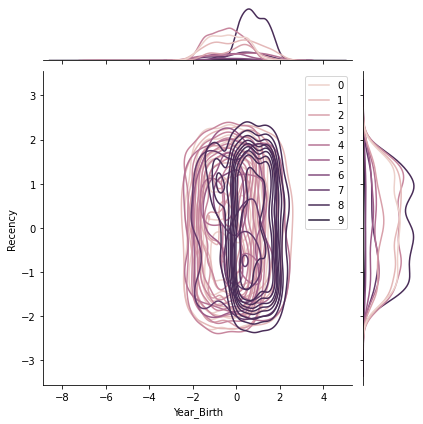

In [28]:
sns.jointplot(x=df['Year_Birth'], y=df["Recency"], hue=kmeans.labels_, kind="kde")
plt.show()

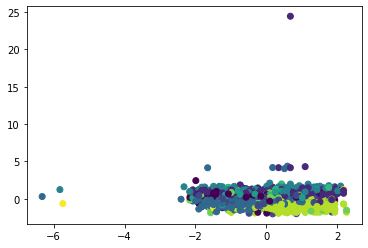

In [11]:
fig2 = plt.figure()
plt.scatter(df.Year_Birth, df.Income, c=kmeans.labels_)

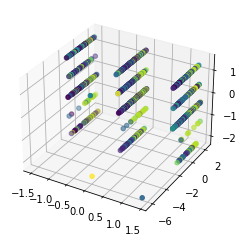

In [12]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df.Dt_Customer, df.Year_Birth, df.Education, c=kmeans.labels_)
plt.show()